In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [15]:
gr1 = np.load("data_evolution/GR1P.npy", allow_pickle =True)
gr2 = np.load("data_evolution/GR2P.npy", allow_pickle =True)
gr5 = np.load("data_evolution/GR5P.npy", allow_pickle =True)
gr7 = np.load("data_evolution/GR7P.npy", allow_pickle =True)
gr8 = np.load("data_evolution/GR8P.npy", allow_pickle =True)
gr9 = np.load("data_evolution/GR9P.npy", allow_pickle =True)
gr10 = np.load("data_evolution/GR10P.npy", allow_pickle =True)


gr1 = gr1[:,39:]
gr2 = gr2[:,39:]
gr5 = gr5[:,:]
gr7 = gr7[:,:]
gr8 = gr8[:,39:]
gr9 = gr9[:,0:]
gr10 = gr10[:,:]

print(gr7.shape)

(5, 360)


In [16]:
def growth(data, gr):
    return np.ones(data.size)*gr


rate = np.array([2, 2.5, 1, 7.5, 4.2, 30, 12])

T = np.concatenate((gr1[0,:], gr2[0,:], gr5[0,:-450],
                    gr7[0,:], gr8[0,:], gr9[0,0:111], gr10[0,:180]))
R = np.concatenate((gr1[1,:], gr2[1,:], gr5[1,:-450],
                    gr7[1,:], gr8[1,:], gr9[1,0:111], gr10[1,:180]))
Gr = np.concatenate((growth(gr1[0,:],rate[0]),
                     growth(gr2[0,:],rate[1]),
                     growth(gr5[0,:-450],rate[2]),
                     growth(gr7[0,:],rate[3]),
                     growth(gr8[0,:],rate[4]),
                     growth(gr9[0,0:111],rate[5]),
                     growth(gr10[0,:180],rate[6])))
print(T.shape, R.shape, Gr.shape)
print(Gr)

(3882,) (3882,) (3882,)
[ 2.  2.  2. ... 12. 12. 12.]


[0.82442145 0.60687781 0.20626499]


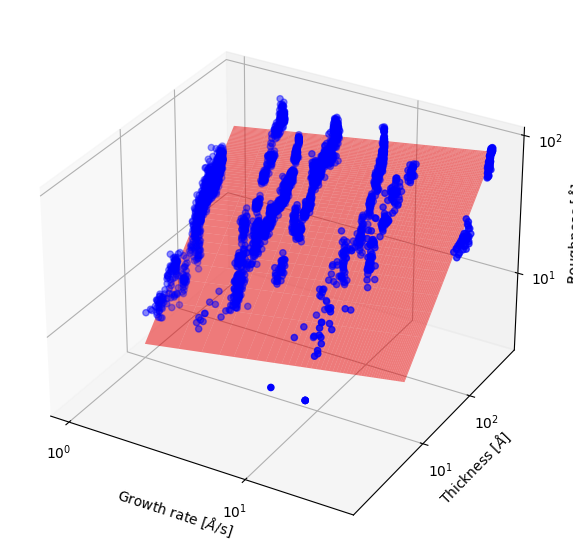

In [17]:

import numpy as np 
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
#%matplotlib widget   
# Generate random 3D data points 
x = Gr
y = T
z = R

data = np.array([x, y, z]).T
y[y <= 0] = 3

# Define mathematical function for curve fitting 
def func(xy, a, b, c): 
    x, y = xy
    #a = 5
    return a * y**b * x**c
  
# Perform curve fitting 
lower_bounds = [0.1, -float('inf'), -float('inf')]
upper_bounds = [2, float('inf'), float('inf')]

# Perform curve fitting with bounds
popt, pcov = curve_fit(func, (x, y), z, bounds=(lower_bounds, upper_bounds))
  
# Print optimized parameters 
print(popt) 

labelsx = ['$10^0$', '$10^1$']
labelsy = ['$10^1$', '$10^2$']
labelsz = ['$10^1$', '$10^2$']


fig = plt.figure(figsize=(8, 7), dpi=100) 
ax = Axes3D(fig) 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(np.log10(x),np.log10(y),np.log10(z), color='blue') 
x_range = np.linspace(1, 30, 100) 
y_range = np.linspace(10, 610, 600) 
X, Y = np.meshgrid(x_range, y_range) 
Z = func((X, Y), *popt) 
ax.plot_surface(np.log10(X), np.log10(Y), np.log10(Z), color='red', alpha=0.5)


ax.set_xlabel('Growth rate [$\\AA$/s]') 
ax.set_ylabel('Thickness [$\\AA$]') 
ax.set_zlabel('Roughness [$\\AA$]')

ax.set_xticks([0, 1], labelsx)
ax.set_yticks([1, 2], labelsy)
ax.set_zticks([1, 2], labelsz)

plt.show()